In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(9, 13),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

extent = [-39, -38.25, -13.25, -12.5]

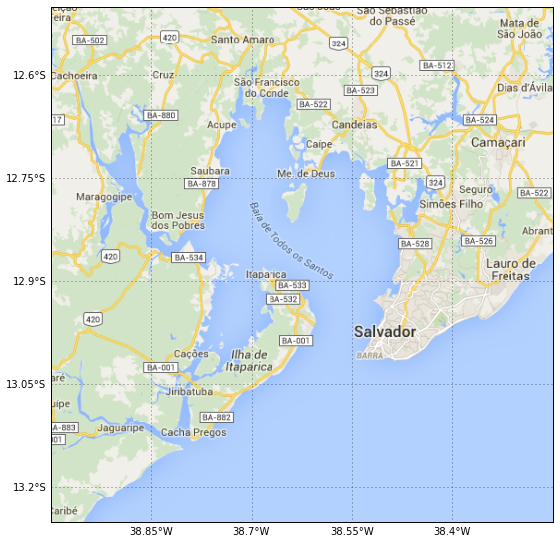

In [2]:
import cartopy.io.img_tiles as cimgt

request = cimgt.GoogleTiles()

fig, ax = make_map(projection=request.crs)
ax.set_extent(extent)

ax.add_image(request, 10)

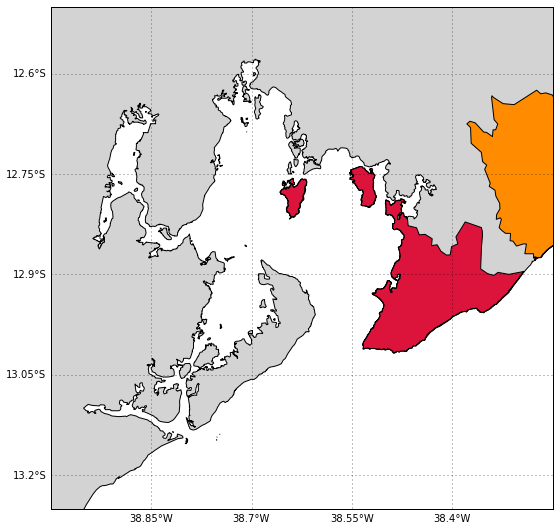

In [3]:
fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent(extent)

shp = shapereader.Reader('./OSM_land/BTS')
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='lightgray',
                      edgecolor='black')
    
shp = shapereader.Reader('./BRA/BRA_adm2')
for record, geometry in zip(shp.records(), shp.geometries()):
    if record.attributes['NAME_2'].decode('latin-1') == 'Salvador':
        ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='crimson',
                          edgecolor='black')
    elif record.attributes['NAME_2'].decode('latin-1') == u'Camaçari':
        ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='darkorange',
                          edgecolor='black')